In [2]:
from dotenv import load_dotenv
import sys

sys.path.append("../../common")
load_dotenv()

True

In [3]:
import os
from langsmith_tracker import set_tracking

# 인스턴스를 생성할 때 필요한 매개변수를 전달합니다.

set_tracking(project_name="17.LangGraph")

Langsmith 추적이 활성화되었습니다. [프로젝트명: 17.LangGraph]


### ToolNode 를 사용하여 도구를 호출하는 방법

ToolNode는 여러개의 도구를 바인딩 하여 직접 실행할 수 있습니다.
  
도구를 노드로서 활용해야 하므로 패키징이 필요한데, 그때 사용하는 것이 ToolNode 입니다.

##### 1. 도구 정의

In [4]:
from langchain_core.messages import AIMessage
from langchain_core.tools import tool
from langchain_experimental.tools.python.tool import PythonAstREPLTool
from tools_news import GoogleNews
from typing import List, Dict


@tool
def search_news(query: str) -> List[Dict[str, str]]:
    """Search news for the given query."""
    news_tool = GoogleNews()
    return news_tool.search_by_keyword(query, k=5)


@tool
def python_code_interpreter(code: str):
    """Call to excute python code."""
    return PythonAstREPLTool().invoke(code)

##### 2. ToolNode 초기화

In [5]:
from langgraph.prebuilt import ToolNode, tools_condition

# 도구 리스트 생성
tools = [search_news, python_code_interpreter]

# ToolNode 초기화
tool_node = ToolNode(tools=tools)

##### 3. ToolNode 사용

수동으로 호출합니다.

In [7]:
message_with_single_tool_call = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news",  # 도구 이름, 수동으로 지정
            "args": {"query": "AI"},  # 도구 매개변수
            "id": "tool_call_id",  # 도구 호출 ID
            "type": "tool_call",  # 도구 호출 유형
        }
    ],
)

# 도구 노드를 통한 메시지 처리 및 날씨 정보 요청 실행
tool_node.invoke({"messages": [message_with_single_tool_call]})

{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1IRWtJT3VTVmZ5WkNaWGh6bnRnTmQxT1ZzdHVaM0RaZW5peFJrSEU0cnVOaGt2c3Z3cXZYLXNSYlNFZXVPc1Fpdkh4MG5KaGd6eHI3RnhkbnNYRjFOSzE2VkFvV1Y2UU9tR3c?oc=5", "content": "오픈AI \\"AI 에이전트 별도 출시 없이 \'챗GPT\'에 추가\\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiWkFVX3lxTE03cFVWLXl3SDJ2cHlmazdoNUF5RWVNQVV0dkxJWW9FUEZmY1Q4YlJOUVlyRnNCUE5SbzY4dzZpaFcxR1QzUndKS2tiMlVYcnJuSEtrXzFpc2E2Z9IBVEFVX3lxTFB3LXpCOVR5bmdla25CM3dFM0lDdVVkOW1LSlFiREJUOFAwanNjMVlqZVhjM3prRGJIWWNjQUtELS1VYTUtUTFYTlhYQXh1T25KSWNwZg?oc=5", "content": "\'챗GPT\' 수능 국어 풀었더니…1년 만에 \'대반전\' 일어났다 - 한국경제"}, {"url": "https://news.google.com/rss/articles/CBMiTEFVX3lxTE9VN2tWdUpLNHFCYjZtQmtPdXdzMktPWUdCYk1va09DTTQxMjJMTG1xTVNmZ0VHelhrSmJ6VUFGVGxnemVwVS1hd1JXNzY?oc=5", "content": "챗GPT 맘껏 사용하려면 월28만원…오픈AI, 수익화 시동 [AI브리핑] - 아이뉴스24"}, {"url": "https://news.google.com/rss/articles/CBMiTkFVX3lxTE9UR0h6ekhRRXFVM0prZENEQWJudHk1cDNpTFRULWFCNHE5emdKV181MF

두개 이상의 도구호출을 병렬적으로 호출합니다.

In [10]:
message_with_multiple_tool_call = AIMessage(
    content="",
    tool_calls=[
        {
            "name": "search_news",
            "args": {"query": "AI"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
        {
            "name": "python_code_interpreter",
            "args": {"code": "print('Hello, World!')"},
            "id": "tool_call_id",
            "type": "tool_call",
        },
    ],
)

# 도구 노드를 통한 메시지 처리 및 날씨 정보 요청 실행
tool_node.invoke({"messages": [message_with_multiple_tool_call]})

{'messages': [ToolMessage(content='[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1IRWtJT3VTVmZ5WkNaWGh6bnRnTmQxT1ZzdHVaM0RaZW5peFJrSEU0cnVOaGt2c3Z3cXZYLXNSYlNFZXVPc1Fpdkh4MG5KaGd6eHI3RnhkbnNYRjFOSzE2VkFvV1Y2UU9tR3c?oc=5", "content": "오픈AI \\"AI 에이전트 별도 출시 없이 \'챗GPT\'에 추가\\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiWkFVX3lxTE03cFVWLXl3SDJ2cHlmazdoNUF5RWVNQVV0dkxJWW9FUEZmY1Q4YlJOUVlyRnNCUE5SbzY4dzZpaFcxR1QzUndKS2tiMlVYcnJuSEtrXzFpc2E2Z9IBVEFVX3lxTFB3LXpCOVR5bmdla25CM3dFM0lDdVVkOW1LSlFiREJUOFAwanNjMVlqZVhjM3prRGJIWWNjQUtELS1VYTUtUTFYTlhYQXh1T25KSWNwZg?oc=5", "content": "\'챗GPT\' 수능 국어 풀었더니…1년 만에 \'대반전\' 일어났다 - 한국경제"}, {"url": "https://news.google.com/rss/articles/CBMiTEFVX3lxTE9VN2tWdUpLNHFCYjZtQmtPdXdzMktPWUdCYk1va09DTTQxMjJMTG1xTVNmZ0VHelhrSmJ6VUFGVGxnemVwVS1hd1JXNzY?oc=5", "content": "챗GPT 맘껏 사용하려면 월28만원…오픈AI, 수익화 시동 [AI브리핑] - 아이뉴스24"}, {"url": "https://news.google.com/rss/articles/CBMiTkFVX3lxTE9UR0h6ekhRRXFVM0prZENEQWJudHk1cDNpTFRULWFCNHE5emdKV181MF

##### 4. LLM과 함께 사용하기

도구 호출 기능이 있는 채팅 모델을 사용하기 위해서는 먼저 모델이 사용 가능한 도구들을 인식하도록 해야합니다.  
  
`ChatOpenAI` 모델에서 `.bind_tools()` 메서드를 호출하여 수행합니다.

In [12]:
from langchain_openai import ChatOpenAI

# llm 초기화 및 도구 바인딩
model_with_tools = ChatOpenAI(model_name="gpt-4o-mini", temperature=0).bind_tools(tools)

# 도구 호출 확인, 어떤 판단을 내리는지 확인
model_with_tools.invoke(
    "처음 다섯개의 소수를 출력하는 Python code 를 작성해줘"
).tool_calls

[{'name': 'python_code_interpreter',
  'args': {'code': 'def first_five_primes():\n    primes = []\n    num = 2  # Starting from the first prime number\n    while len(primes) < 5:\n        is_prime = True\n        for i in range(2, int(num**0.5) + 1):\n            if num % i == 0:\n                is_prime = False\n                break\n        if is_prime:\n            primes.append(num)\n        num += 1\n    return primes\n\nfirst_five_primes()'},
  'id': 'call_vUpDtAFYiIrUgUZRdvfLS5P6',
  'type': 'tool_call'}]

이렇게 자동으로 작성된 내용은 위의 message_with_single_tool_call 과 같은 역할을 합니다. 

In [13]:
# 도구 노드를 통한 메시지 처리 및 LLM 모델의 도구 기반 응답 생성
tool_node.invoke(
    {
        "messages": [
            model_with_tools.invoke(
                "처음 다섯개의 소수를 출력하는 Python code 를 작성해줘"
            )
        ]
    }
)

{'messages': [ToolMessage(content='[2, 3, 5, 7, 11]', name='python_code_interpreter', tool_call_id='call_bMVZrk1lVliZvuS6UFvTdVR8')]}

##### 5. Agent와 함께 사용하기

LangGraph 내에서 `ToolNode` 를 사용하는 방법입니다.

In [14]:
# LangGraph 워크플로우 상태 및 메시지 처리를 위한 타입 임포트
from langgraph.graph import StateGraph, MessagesState, START, END


# LLM 모델을 사용하여 메시지 처리 및 응답 생성, 도구 호출이 포함된 응답 반환
def call_model(state: MessagesState):
    messages = state["messages"]
    response = model_with_tools.invoke(messages)
    return {"messages": [response]}


# 메시지 상태 기반 워크플로우 그래프 초기화
workflow = StateGraph(MessagesState)

# 에이전트와 도구 노드 정의 및 워크플로우 그래프에 추가
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# 워크플로우 시작점에서 에이전트 노드로 연결
workflow.add_edge(START, "agent")

# 에이전트 노드에서 조건부 분기 설정, 도구 노드 또는 종료 지점으로 연결
workflow.add_conditional_edges("agent", tools_condition)

# 도구 노드에서 에이전트 노드로 순환 연결
workflow.add_edge("tools", "agent")

# 에이전트 노드에서 종료 지점으로 연결
workflow.add_edge("agent", END)


# 정의된 워크플로우 그래프 컴파일 및 실행 가능한 애플리케이션 생성
app = workflow.compile()

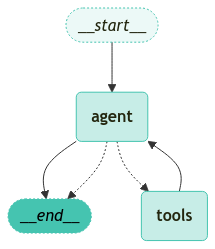

In [16]:
from graphs import visualize_graph

visualize_graph(app)

##### 6. 실행결과를 확인합니다.

In [17]:
# 실행 및 결과 확인
for chunk in app.stream(
    {"messages": [("human", "처음 5개의 소수를 출력하는 python code 를 작성해줘")]},
    stream_mode="values",
):
    # 마지막 메시지 출력
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

처음 5개의 소수를 출력하는 python code 를 작성해줘
================================== Ai Message ==================================
Tool Calls:
  python_code_interpreter (call_FM7PB9FR9jIUFRSPVXiEZsp6)
 Call ID: call_FM7PB9FR9jIUFRSPVXiEZsp6
  Args:
    code: def first_n_primes(n):
    primes = []
    num = 2  # Starting from the first prime number
    while len(primes) < n:
        is_prime = True
        for i in range(2, int(num**0.5) + 1):
            if num % i == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(num)
        num += 1
    return primes

# Get the first 5 prime numbers
first_n_primes(5)
================================= Tool Message =================================
Name: python_code_interpreter

[2, 3, 5, 7, 11]
================================== Ai Message ==================================

처음 5개의 소수는 다음과 같습니다: [2, 3, 5, 7, 11]


In [18]:
# 검색 질문 수행
for chunk in app.stream(
    {"messages": [("human", "search google news about AI")]},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

search google news about AI
================================== Ai Message ==================================
Tool Calls:
  search_news (call_NEWV5sZIKWw1wEe9LcJCzqu2)
 Call ID: call_NEWV5sZIKWw1wEe9LcJCzqu2
  Args:
    query: AI
================================= Tool Message =================================
Name: search_news

[{"url": "https://news.google.com/rss/articles/CBMiakFVX3lxTE1IRWtJT3VTVmZ5WkNaWGh6bnRnTmQxT1ZzdHVaM0RaZW5peFJrSEU0cnVOaGt2c3Z3cXZYLXNSYlNFZXVPc1Fpdkh4MG5KaGd6eHI3RnhkbnNYRjFOSzE2VkFvV1Y2UU9tR3c?oc=5", "content": "오픈AI \"AI 에이전트 별도 출시 없이 '챗GPT'에 추가\" - AI타임스"}, {"url": "https://news.google.com/rss/articles/CBMiWkFVX3lxTE03cFVWLXl3SDJ2cHlmazdoNUF5RWVNQVV0dkxJWW9FUEZmY1Q4YlJOUVlyRnNCUE5SbzY4dzZpaFcxR1QzUndKS2tiMlVYcnJuSEtrXzFpc2E2Z9IBVEFVX3lxTFB3LXpCOVR5bmdla25CM3dFM0lDdVVkOW1LSlFiREJUOFAwanNjMVlqZVhjM3prRGJIWWNjQUtELS1VYTUtUTFYTlhYQXh1T25KSWNwZg?oc=5", "content": "'챗GPT' 수능 국어 풀었더니…1

In [19]:
# 도구 호출이 필요 없는 질문 수행
for chunk in app.stream(
    {"messages": [("human", "안녕? 반가워")]},
    stream_mode="values",
):
    chunk["messages"][-1].pretty_print()

================================ Human Message =================================

안녕? 반가워
================================== Ai Message ==================================

안녕하세요! 반가워요. 어떻게 도와드릴까요?
